Plotting/Analysis of Data
-------------------------
Now possible on private machines by utilizing `bigjson` package to budget memory

In [112]:
# Installs
#!cythonize -a -i *.pyx
#!pip install git+http://github.com/aarjaneiro/parallelqueue@cythonized
#!pip install bokeh
#!pip install bigjson 

In [113]:
from parallelqueue.base_models import *
from parallelqueue.monitors import *
import matplotlib.pyplot as plt
from datahelpers import *

In [114]:
local = FullImport("Tsim",0)

In [115]:
test = PrepPlot(local, 25, 1)

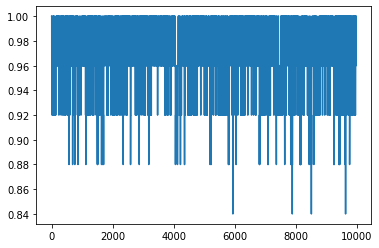

In [116]:
plt.plot([e(1) for e in test])